In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('breastCancer.csv')

In [3]:
data.head()

id  clump_thickness  size_uniformity  shape_uniformity  \
0  1000025                5                1                 1   
1  1002945                5                4                 4   
2  1015425                3                1                 1   
3  1016277                6                8                 8   
4  1017023                4                1                 1   

   marginal_adhesion  epithelial_size bare_nucleoli  bland_chromatin  \
0                  1                2             1                3   
1                  5                7            10                3   
2                  1                2             2                3   
3                  1                3             4                3   
4                  3                2             1                3   

   normal_nucleoli  mitoses  class  
0                1        1      2  
1                2        1      2  
2                1        1      2  
3                7        1      2  
4                1        1      2

In [4]:
data.shape

(699, 11)

## Data pre-processing

In [5]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
data['bare_nucleoli']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [12]:
for idx, state in enumerate(data.bare_nucleoli.str.isdigit()):
    if state == False: print(idx)

23
40
139
145
158
164
235
249
275
292
294
297
315
321
411
617


In [13]:
data.bare_nucleoli.iloc[23]

'?'

In [9]:
data[data['bare_nucleoli'] == '?']

id  clump_thickness  size_uniformity  shape_uniformity  \
23   1057013                8                4                 5   
40   1096800                6                6                 6   
139  1183246                1                1                 1   
145  1184840                1                1                 3   
158  1193683                1                1                 2   
164  1197510                5                1                 1   
235  1241232                3                1                 4   
249   169356                3                1                 1   
275   432809                3                1                 3   
292   563649                8                8                 8   
294   606140                1                1                 1   
297    61634                5                4                 3   
315   704168                4                6                 5   
321   733639                3                1                 1   
411  1238464                1                1                 1   
617  1057067                1                1                 1   

     marginal_adhesion  epithelial_size bare_nucleoli  bland_chromatin  \
23                   1                2             ?                7   
40                   9                6             ?                7   
139                  1                1             ?                2   
145                  1                2             ?                2   
158                  1                3             ?                1   
164                  1                2             ?                3   
235                  1                2             ?                3   
249                  1                2             ?                3   
275                  1                2             ?                2   
292                  1                2             ?                6   
294                  1                2             ?                2   
297                  1                2             ?                2   
315                  6                7             ?                4   
321                  1                2             ?                3   
411                  1                1             ?                2   
617                  1                1             ?                1   

     normal_nucleoli  mitoses  class  
23                 3        1      4  
40                 8        1      2  
139                1        1      2  
145                1        1      2  
158                1        1      2  
164                1        1      2  
235                1        1      2  
249                1        1      2  
275                1        1      2  
292               10        1      4  
294                1        1      2  
297                3        1      2  
315                9        1      2  
321                1        1      2  
411                1        1      2  
617                1        1      2

In [14]:
df = data.replace('?', np.nan)

In [15]:
df.head()

id  clump_thickness  size_uniformity  shape_uniformity  \
0  1000025                5                1                 1   
1  1002945                5                4                 4   
2  1015425                3                1                 1   
3  1016277                6                8                 8   
4  1017023                4                1                 1   

   marginal_adhesion  epithelial_size bare_nucleoli  bland_chromatin  \
0                  1                2             1                3   
1                  5                7            10                3   
2                  1                2             2                3   
3                  1                3             4                3   
4                  3                2             1                3   

   normal_nucleoli  mitoses  class  
0                1        1      2  
1                2        1      2  
2                1        1      2  
3                7        1      2  
4                1        1      2

In [16]:
df.iloc[23]

id                   1057013
clump_thickness            8
size_uniformity            4
shape_uniformity           5
marginal_adhesion          1
epithelial_size            2
bare_nucleoli            NaN
bland_chromatin            7
normal_nucleoli            3
mitoses                    1
class                      4
Name: 23, dtype: object

In [17]:
df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [18]:
df = df.fillna(df.median())

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [22]:
df = df.astype('int64')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 699 non-null    int64
 1   clump_thickness    699 non-null    int64
 2   size_uniformity    699 non-null    int64
 3   shape_uniformity   699 non-null    int64
 4   marginal_adhesion  699 non-null    int64
 5   epithelial_size    699 non-null    int64
 6   bare_nucleoli      699 non-null    int64
 7   bland_chromatin    699 non-null    int64
 8   normal_nucleoli    699 non-null    int64
 9   mitoses            699 non-null    int64
 10  class              699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


## Exploratory Data Analysis

In [25]:
df.head()

id  clump_thickness  size_uniformity  shape_uniformity  \
0  1000025                5                1                 1   
1  1002945                5                4                 4   
2  1015425                3                1                 1   
3  1016277                6                8                 8   
4  1017023                4                1                 1   

   marginal_adhesion  epithelial_size  bare_nucleoli  bland_chromatin  \
0                  1                2              1                3   
1                  5                7             10                3   
2                  1                2              2                3   
3                  1                3              4                3   
4                  3                2              1                3   

   normal_nucleoli  mitoses  class  
0                1        1      2  
1                2        1      2  
2                1        1      2  
3                7        1      2  
4                1        1      2

In [26]:
df.drop('id', axis=1, inplace=True)

In [28]:
df.head()

clump_thickness  size_uniformity  shape_uniformity  marginal_adhesion  \
0                5                1                 1                  1   
1                5                4                 4                  5   
2                3                1                 1                  1   
3                6                8                 8                  1   
4                4                1                 1                  3   

   epithelial_size  bare_nucleoli  bland_chromatin  normal_nucleoli  mitoses  \
0                2              1                3                1        1   
1                7             10                3                2        1   
2                2              2                3                1        1   
3                3              4                3                7        1   
4                2              1                3                1        1   

   class  
0      2  
1      2  
2      2  
3      2  
4      2

In [30]:
df.describe().T

count      mean       std  min  25%  50%  75%   max
clump_thickness    699.0  4.417740  2.815741  1.0  2.0  4.0  6.0  10.0
size_uniformity    699.0  3.134478  3.051459  1.0  1.0  1.0  5.0  10.0
shape_uniformity   699.0  3.207439  2.971913  1.0  1.0  1.0  5.0  10.0
marginal_adhesion  699.0  2.806867  2.855379  1.0  1.0  1.0  4.0  10.0
epithelial_size    699.0  3.216023  2.214300  1.0  2.0  2.0  4.0  10.0
bare_nucleoli      699.0  3.486409  3.621929  1.0  1.0  1.0  5.0  10.0
bland_chromatin    699.0  3.437768  2.438364  1.0  2.0  3.0  5.0  10.0
normal_nucleoli    699.0  2.866953  3.053634  1.0  1.0  1.0  4.0  10.0
mitoses            699.0  1.589413  1.715078  1.0  1.0  1.0  1.0  10.0
class              699.0  2.689557  0.951273  2.0  2.0  2.0  4.0   4.0

## Bivaraiate Data Analysis

<AxesSubplot:xlabel='class', ylabel='Density'>

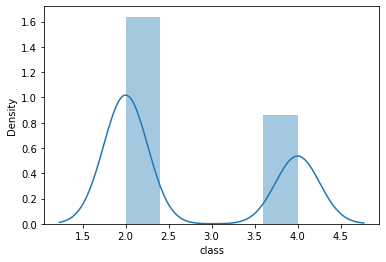

In [31]:
sns.distplot(df['class'])

## Multivariate Data Analysis

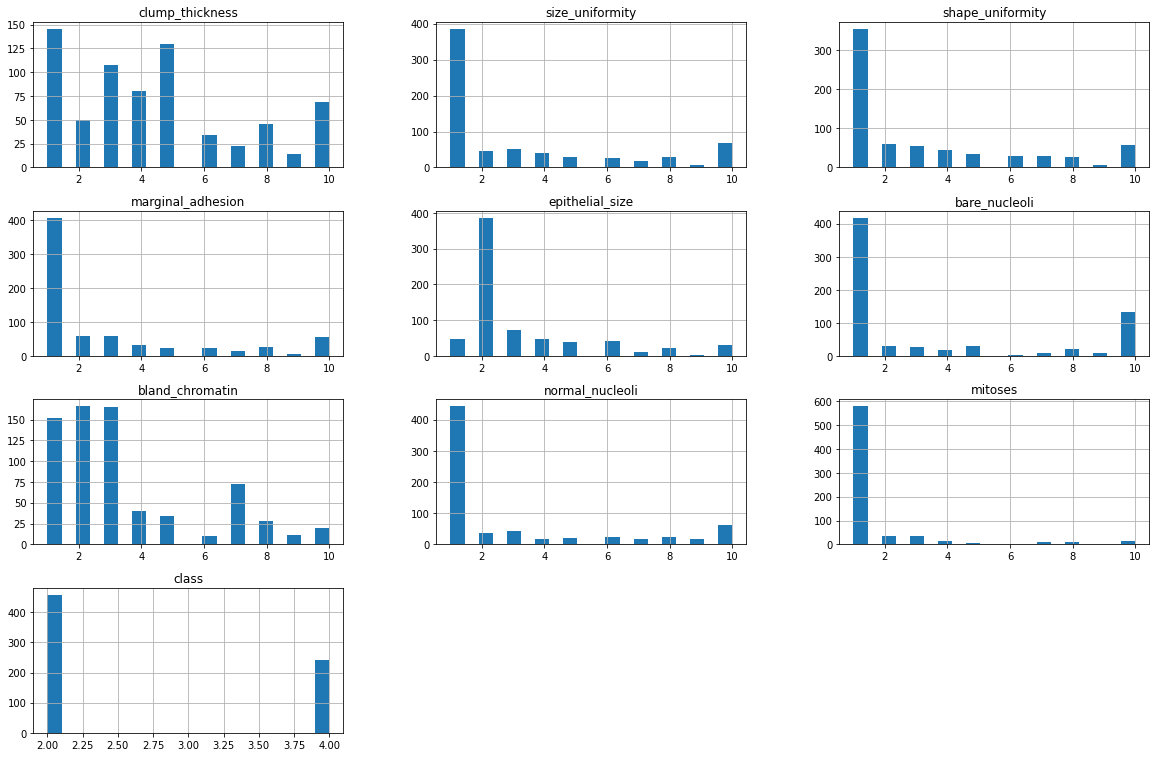

In [35]:
df.hist(bins=20, figsize=(20, 20), layout=(6, 3));

<AxesSubplot:>

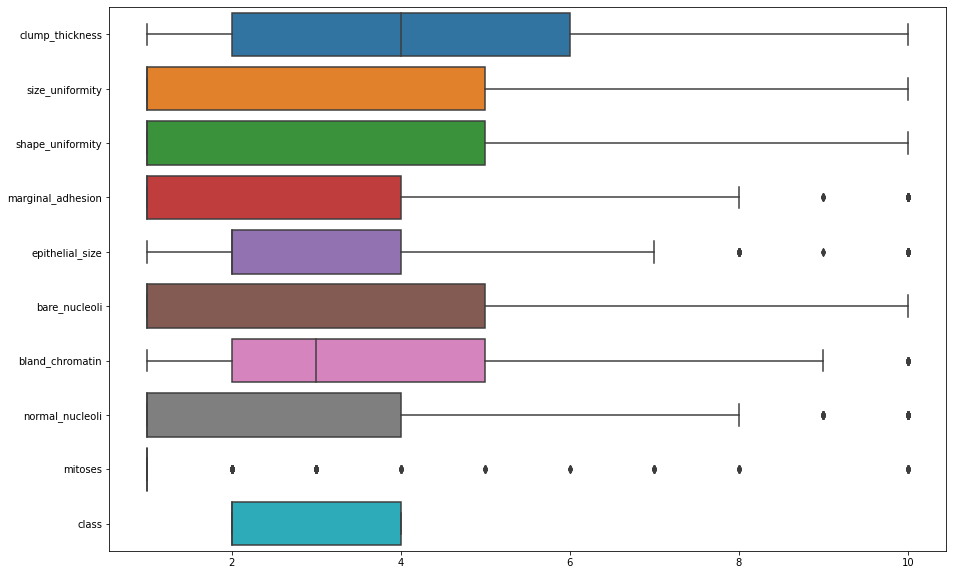

In [37]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient='h')

In [38]:
df.corr()

clump_thickness  size_uniformity  shape_uniformity  \
clump_thickness           1.000000         0.644913          0.654589   
size_uniformity           0.644913         1.000000          0.906882   
shape_uniformity          0.654589         0.906882          1.000000   
marginal_adhesion         0.486356         0.705582          0.683079   
epithelial_size           0.521816         0.751799          0.719668   
bare_nucleoli             0.590008         0.686673          0.707474   
bland_chromatin           0.558428         0.755721          0.735948   
normal_nucleoli           0.535835         0.722865          0.719446   
mitoses                   0.350034         0.458693          0.438911   
class                     0.716001         0.817904          0.818934   

                   marginal_adhesion  epithelial_size  bare_nucleoli  \
clump_thickness             0.486356         0.521816       0.590008   
size_uniformity             0.705582         0.751799       0.686673   
shape_uniformity            0.683079         0.719668       0.707474   
marginal_adhesion           1.000000         0.599599       0.666971   
epithelial_size             0.599599         1.000000       0.583701   
bare_nucleoli               0.666971         0.583701       1.000000   
bland_chromatin             0.666715         0.616102       0.674215   
normal_nucleoli             0.603352         0.628881       0.574778   
mitoses                     0.417633         0.479101       0.342397   
class                       0.696800         0.682785       0.818968   

                   bland_chromatin  normal_nucleoli   mitoses     class  
clump_thickness           0.558428         0.535835  0.350034  0.716001  
size_uniformity           0.755721         0.722865  0.458693  0.817904  
shape_uniformity          0.735948         0.719446  0.438911  0.818934  
marginal_adhesion         0.666715         0.603352  0.417633  0.696800  
epithelial_size           0.616102         0.628881  0.479101  0.682785  
bare_nucleoli             0.674215         0.574778  0.342397  0.818968  
bland_chromatin           1.000000         0.665878  0.344169  0.756616  
normal_nucleoli           0.665878         1.000000  0.428336  0.712244  
mitoses                   0.344169         0.428336  1.000000  0.423170  
class                     0.756616         0.712244  0.423170  1.000000

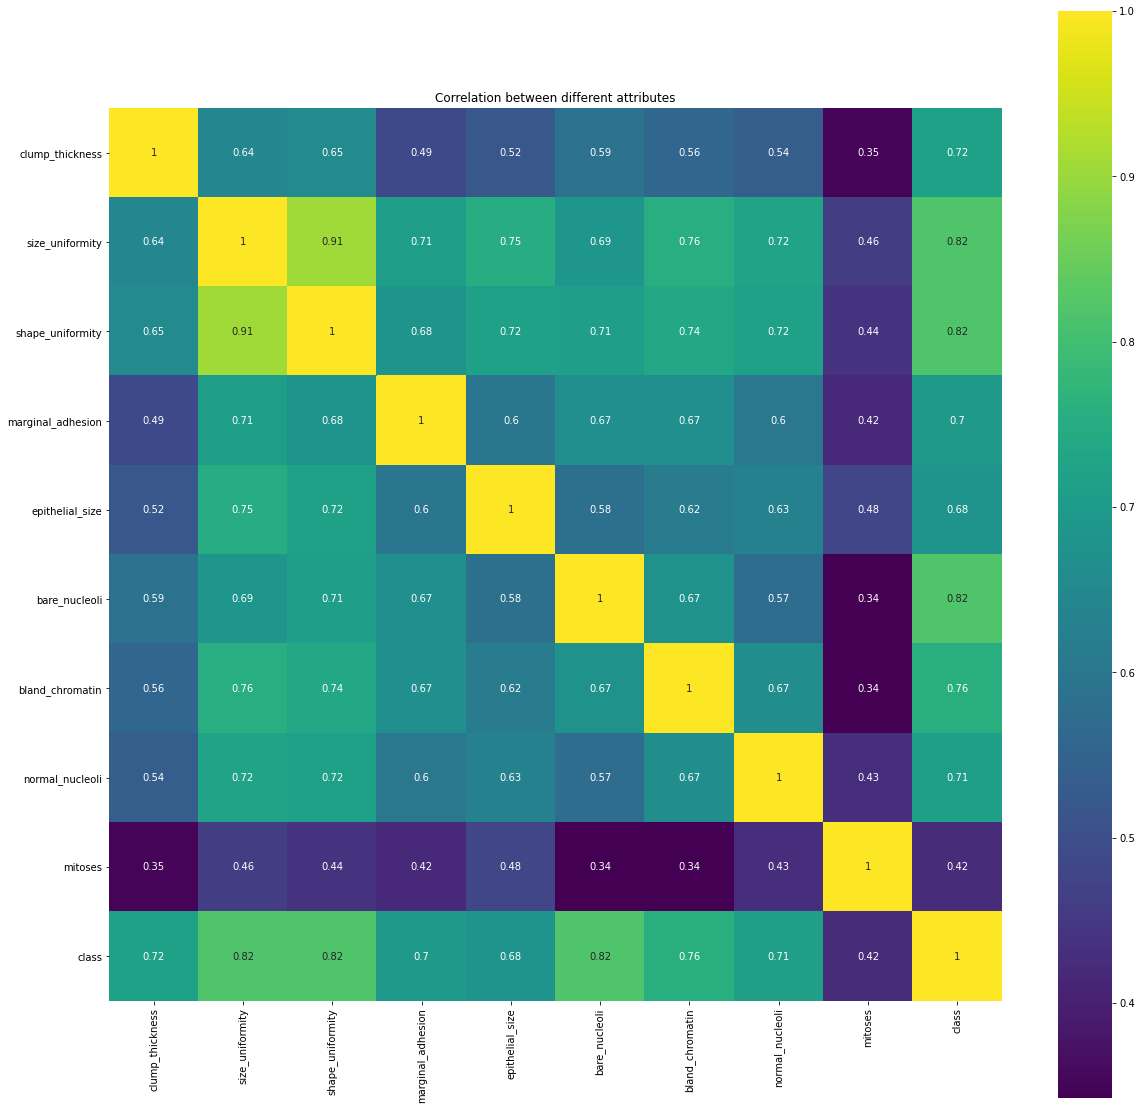

In [39]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

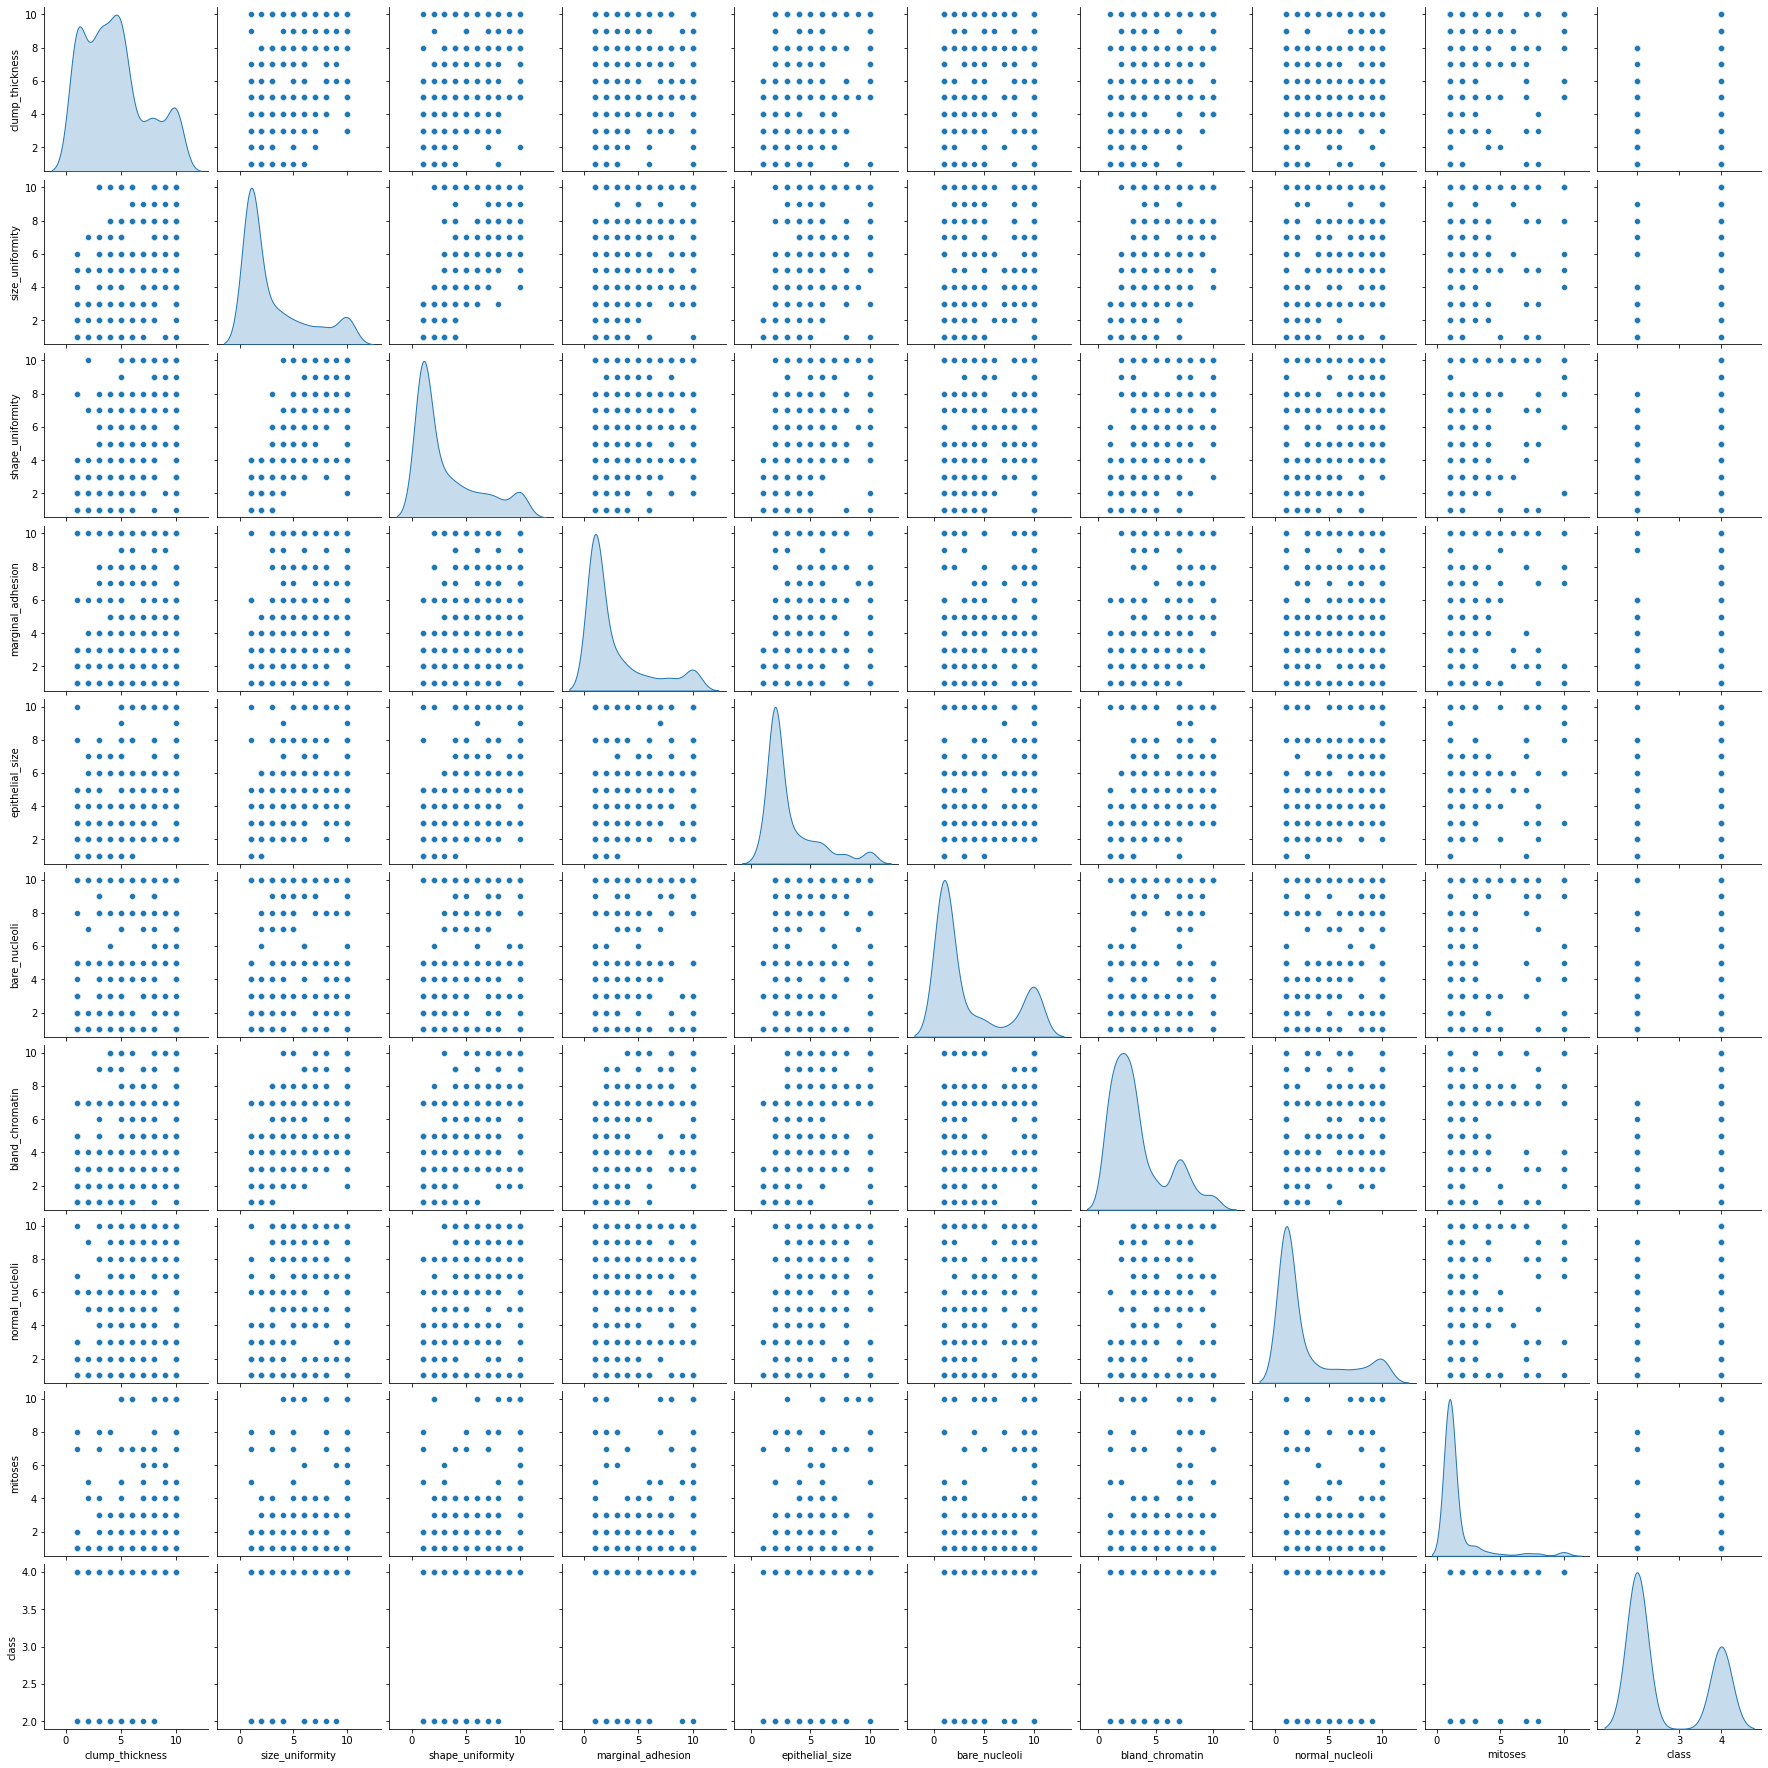

In [40]:
sns.pairplot(df, diag_kind='kde')

## Building Our Model

In [41]:
X = df.drop(['class'], axis=1)
y = df['class']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(489, 9) (210, 9) (489,) (210,)


## KNeighborsClassifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
KNN = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [46]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [47]:
predicted_1 = KNN.predict(X_test)
predicted_1

array([2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2,
       4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2])

In [49]:
from scipy.stats import zscore

print(f'KNeiighborsClassifier Algorithm is predicting at: {KNN.score(X_test, y_test)*100:.2f}')

KNeiighborsClassifier Algorithm is predicting at: 98.10


## Support Vector Machine 

In [55]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [56]:
predicted_2= svc.predict(X_test)
predicted_2

array([2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2,
       4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4,
       4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2])

In [57]:
print(f'Support Vector Machine Classifier Algorithm is predicting at: {svc.score(X_test, y_test)*100:.2f}')

Support Vector Machine Classifier Algorithm is predicting at: 97.14


In [58]:
knnPred = pd.DataFrame(predicted_1)
svcPred = pd.DataFrame(predicted_2)

In [61]:
df1 = pd.concat([knnPred, svcPred], axis=1)

In [62]:
df1.columns = ['knn', 'svc']

In [64]:
df1

knn  svc
0      2    2
1      2    2
2      2    2
3      4    4
4      2    2
..   ...  ...
205    2    2
206    2    2
207    2    2
208    2    2
209    2    2

[210 rows x 2 columns]

In [65]:
from sklearn.metrics import classification_report

In [66]:
print('KNN report')
print(classification_report(y_test, predicted_1))

KNN report
              precision    recall  f1-score   support

           2       0.99      0.99      0.99       143
           4       0.97      0.97      0.97        67

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



In [68]:
print('SVC report')
print(classification_report(y_test, predicted_2))

SVC report
              precision    recall  f1-score   support

           2       0.98      0.98      0.98       143
           4       0.96      0.96      0.96        67

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210



In [69]:
from sklearn.metrics import confusion_matrix

Confusion Matrix for KNN


<AxesSubplot:>

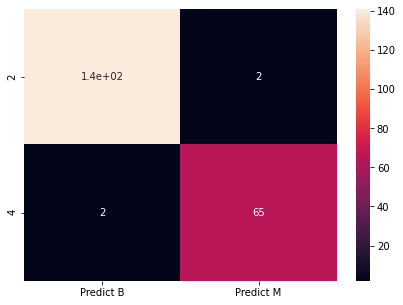

In [71]:
print('Confusion Matrix for KNN')
cm = confusion_matrix(y_test, predicted_1, labels=[2, 4])

df_cm = pd.DataFrame(cm, index=[i for i in [2, 4]], columns=[i for i in ['Predict B', 'Predict M']])

plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True)

Confusion Matrix for SVC


<AxesSubplot:>

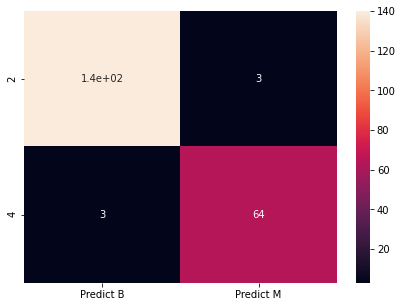

In [72]:
print('Confusion Matrix for SVC')
cm = confusion_matrix(y_test, predicted_2, labels=[2, 4])

df_cm = pd.DataFrame(cm, index=[i for i in [2, 4]], columns=[i for i in ['Predict B', 'Predict M']])

plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True)